In [1]:
import sys
from importlib import reload

In [7]:
from aa_paper_data import PaperData
reload(sys.modules['aa_paper_data'])
from aa_paper_data import PaperData

p = PaperData(flx_name='K_mass')
p.main()

(768, 1152, 51)
(768, 1152)


In [35]:
dic[1]['K_mass_a_b']

,S1_U1_N1_p100,S1_U1_N2_p100,S1_U1_N3_p100,S2_U1_N1_p100,S2_U1_N2_p100,S2_U1_N3_p100
Date,,,,,,
2020-01-01,0,0,0,0.000000,0.000000,0.000000
2021-01-01,0,0,0,0.000000,0.000000,0.000000
2022-01-01,0,0,0,0.000000,0.000000,0.000000
2023-01-01,0,0,0,0.000000,0.000000,0.000000
2024-01-01,0,0,0,0.000000,0.000000,0.000000
2025-01-01,0,0,0,0.000000,0.000000,0.000000
2026-01-01,0,0,0,0.000000,0.000000,0.000000
2027-01-01,0,0,0,0.000000,0.000000,0.000000
2028-01-01,0,0,0,0.000000,0.000000,0.000000


In [10]:
s = 0
for kk in dic:
    s += dic[kk]['ar']

In [12]:
s * 10 ** -6

np.float64(69.46776742797033)

In [9]:
import netCDF4 as nc
import matplotlib.pyplot as plt

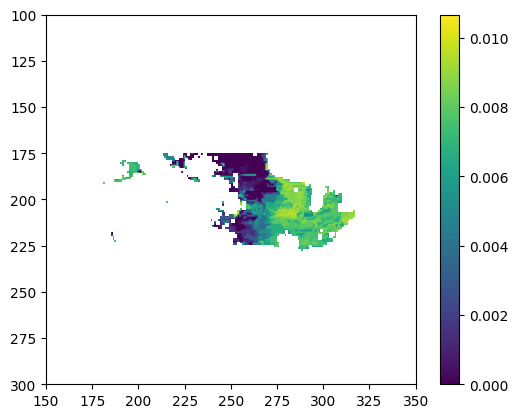

In [28]:
plt.imshow(arr[:,:, -1])
plt.xlim([150, 350])
plt.ylim([300, 100])
plt.colorbar()
plt.show()